In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# EJEMPLO 1

El nuevo punto de datos [0 0] pertenece al clúster: 2
Silhouette Score: 0.848


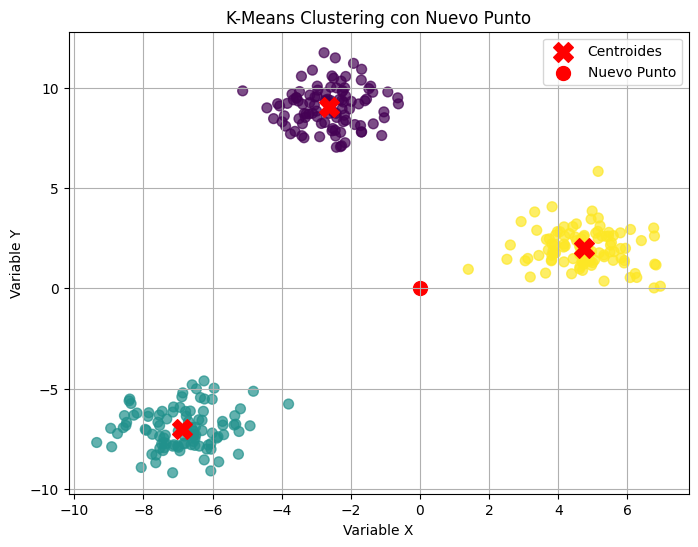

In [20]:
# 1. Generar un dataset sintético con 3 clusters
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# 2. Configurar y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# 3. Obtener las etiquetas de los clusters y los centroides
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 4. Definir un nuevo punto para predecir
nuevo_punto = np.array([[0, 0]])

# 5. Predecir a qué clúster pertenece el nuevo punto
cluster_predicho = kmeans.predict(nuevo_punto)

# 6. Imprimir el resultado de la predicción
print(f"El nuevo punto de datos {nuevo_punto[0]} pertenece al clúster: {cluster_predicho[0]}")

# 7. Visualizar los resultados con el nuevo punto
plt.figure(figsize=(8, 6))

# Dibujar los puntos de datos existentes
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)

# Dibujar los centroides de los clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

# Dibujar el nuevo punto de datos con un marcador distintivo
plt.scatter(nuevo_punto[:, 0], nuevo_punto[:, 1], c='red', marker='o', s=100, label='Nuevo Punto')

# Calcular la métrica Silhouette
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Añadir títulos y etiquetas
plt.title('K-Means Clustering con Nuevo Punto')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()
plt.grid(True)
plt.show()

# EJEMPLO 2

Silhouette Score: -0.036


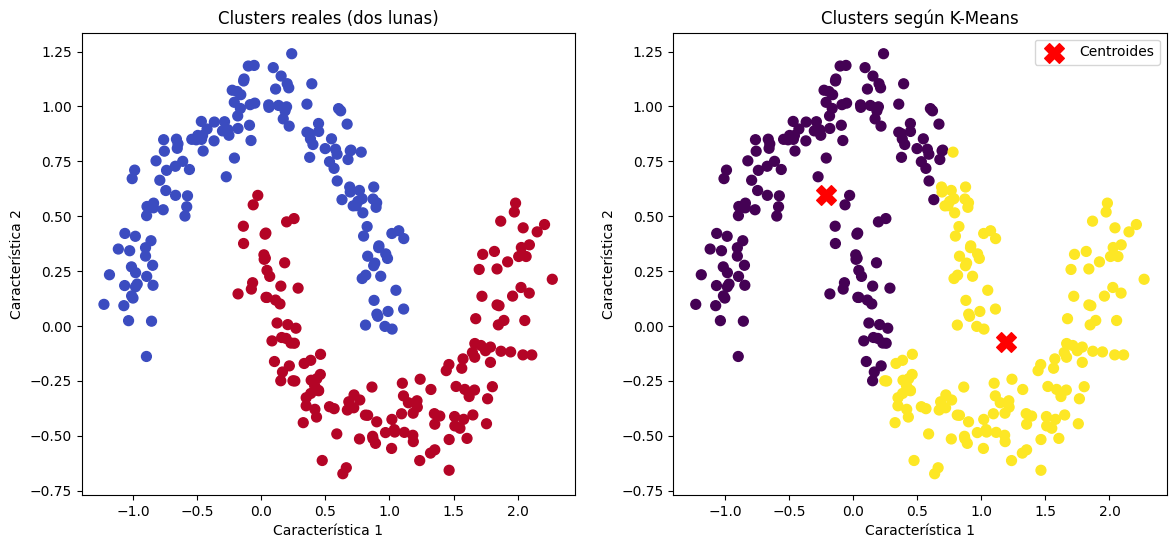

In [21]:
# 1. Generamos datos sintéticos en forma de dos lunas
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# 2. Aplicamos K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 3. Calcular la métrica Silhouette
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# --- Figura con dos subplots ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# (a) Clusters reales (dos lunas)
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap="coolwarm", s=50)
axes[0].set_title("Clusters reales (dos lunas)")
axes[0].set_xlabel("Característica 1")
axes[0].set_ylabel("Característica 2")

# (b) Clusters asignados por K-Means
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", s=50)
centers = kmeans.cluster_centers_
axes[1].scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Centroides")
axes[1].set_title("Clusters según K-Means")
axes[1].set_xlabel("Característica 1")
axes[1].set_ylabel("Característica 2")
axes[1].legend()

plt.show()



Visualización: Los clusters asignados por K-Means se ven “cortando” las lunas en mitades incorrectas.

Lección: K-Means no sirve bien para datos con formas complejas → se introduce la motivación de otros métodos (DBSCAN, clustering jerárquico).

Predicción del nuevo registro: el punto [[1.0, 0.5]] se asigna al cluster más cercano aunque esté en la frontera.

# EJEMPLO 3

## DATASET

**Resumen del dataset de vino**
- El dataset del vino es un conjunto de datos clásico para problemas de clasificación en aprendizaje automático. Contiene el resultado de un análisis químico de vinos cultivados en la misma región de Italia, pero derivados de tres viñedos diferentes.

- Muestras: Hay 178 muestras de vino.

- Características: El dataset tiene 13 características (variables) numéricas, como alcohol, malic_acid, ash, alcalinity_of_ash y magnesium, entre otras. Estas características son las propiedades químicas de cada vino.

- Clases objetivo: Hay tres clases de vino (clase 0, 1 y 2), que corresponden a cada uno de los tres viñedos.

- El objetivo principal al trabajar con este dataset es predecir la clase del vino basándose en sus 13 características químicas, por lo que es ideal para practicar con algoritmos de clasificación.

## ESTADíSTICA DESCRIPTIVA

In [4]:
# 1. Cargar el dataset y convertirlo a un DataFrame de pandas
wine = load_wine()
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

print("--- Análisis de Información del DataFrame ---")
df.info()

--- Análisis de Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline           

**df.info()**

- Muestra número de observaciones (178 vinos) y características (13 atributos + target).

- Todas las variables son numéricas continuas, lo cual facilita aplicar algoritmos de ML sin transformación inicial.

- Idea didáctica: “Siempre revisamos el tamaño y el tipo de datos antes de hacer nada. Aquí confirmamos que no tenemos nulos ni variables categóricas en bruto”.

In [5]:
# 2. Estadísticas Descriptivas de las Características Numéricas
print("\n--- Estadísticas Descriptivas de las Características Numéricas ---")
print(df.describe())


--- Estadísticas Descriptivas de las Características Numéricas ---
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851  

**df.describe()**

- Devuelve medidas estadísticas básicas (media, desviación estándar, mínimos, cuartiles).

- Nos ayuda a ver rangos distintos entre variables (ej. alcohol ~ 13, pero proline > 1000).

- Idea didáctica: “Aquí observamos que necesitamos escalado o normalización antes de aplicar modelos sensibles a magnitudes (como K-Means o SVM)”.

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0



--- Conteo de Vinos por Clase (Viñedo) ---
target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64


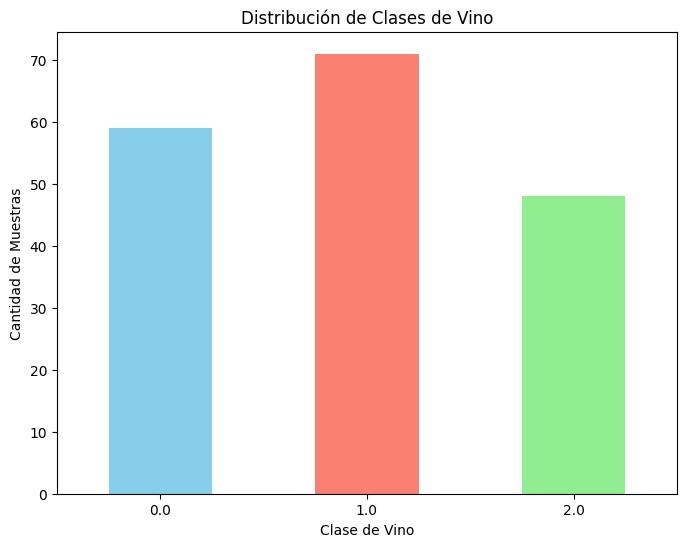

In [7]:
# 3. Análisis de la variable objetivo (target)
print("\n--- Conteo de Vinos por Clase (Viñedo) ---")
print(df['target'].value_counts())

plt.figure(figsize=(8, 6))
df['target'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribución de Clases de Vino')
plt.xlabel('Clase de Vino')
plt.ylabel('Cantidad de Muestras')
plt.xticks(rotation=0)
plt.show()

**Distribución de la variable objetivo (target.value_counts())**

- Vemos desbalance moderado entre las tres clases (clase 0 = 59, clase 1 = 71, clase 2 = 48).

- Importante para clasificación: un dataset muy desbalanceado afectaría métricas como accuracy.

- Idea didáctica: “En problemas reales, el desbalance de clases puede sesgar los modelos. Aquí no es extremo, pero debemos tenerlo en cuenta”.


--- Matriz de Correlación ---


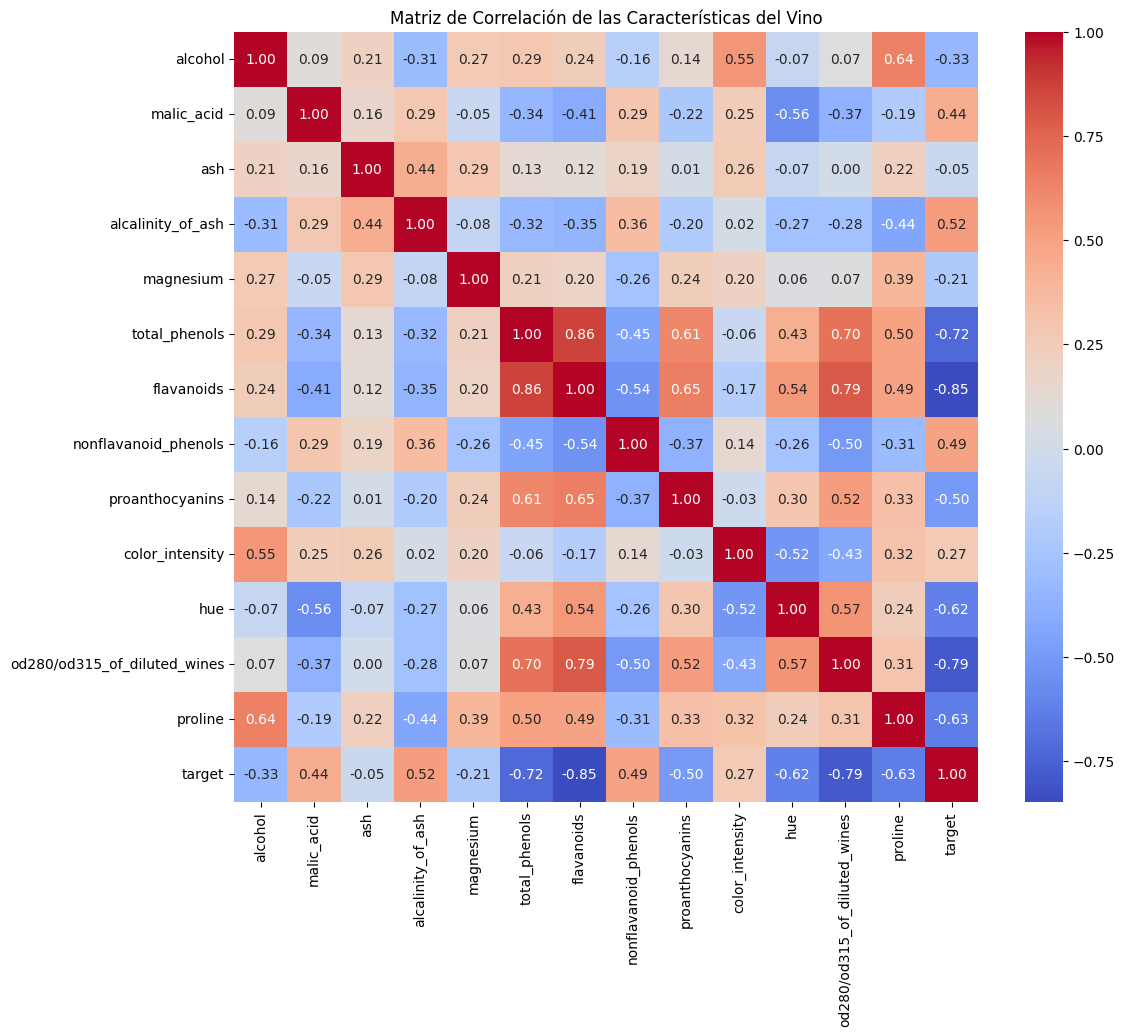

In [8]:
# 4. Matriz de correlación y visualización con Heatmap
print("\n--- Matriz de Correlación ---")
correlation_matrix = df.corr()
#print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Características del Vino')
plt.show()

**Matriz de correlación (heatmap)**

- Detectamos colinealidad (ej. flavanoids vs od280/od315_of_diluted_wines ≈ 0.79).

- Algunas variables aportan información similar → riesgo de redundancia.

- Idea didáctica: “La correlación nos orienta sobre qué variables son más informativas y cuáles podrían eliminarse en selección de características”.


--- Visualización de la Distribución de Variables Clave ---


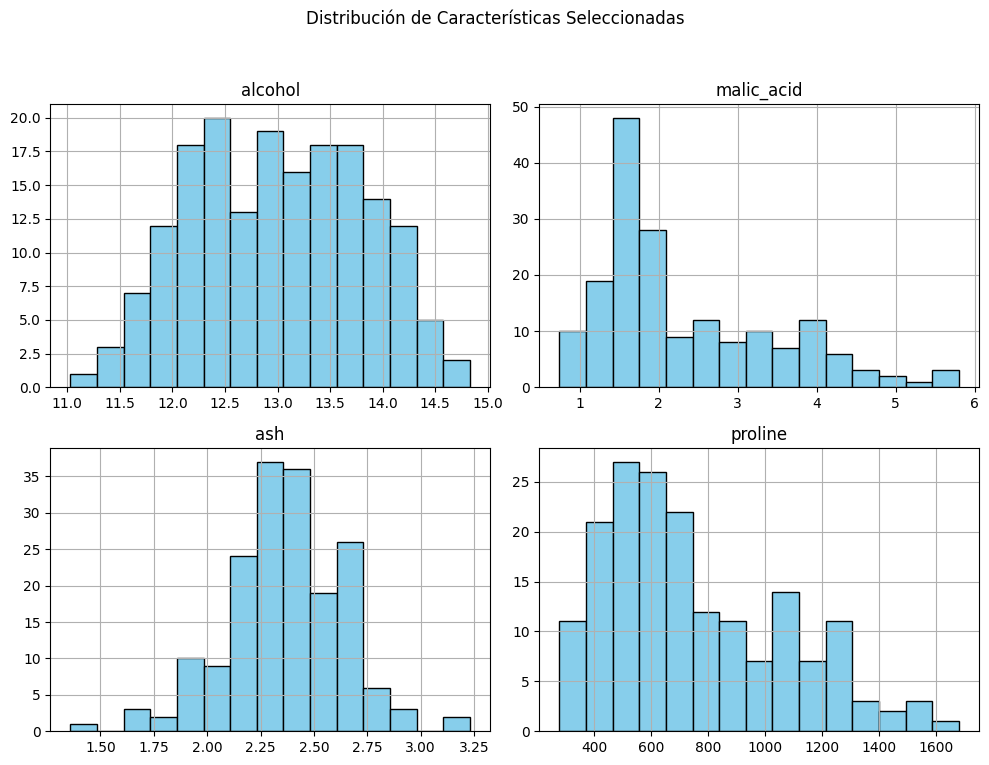

In [9]:
# 5. Histograma para visualizar la distribución de algunas características
print("\n--- Visualización de la Distribución de Variables Clave ---")
selected_features = ['alcohol', 'malic_acid', 'ash', 'proline']
df[selected_features].hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Características Seleccionadas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Histogramas de variables clave**

- alcohol muestra distribución normalizada alrededor de 13.

- malic_acid es más asimétrica, con valores concentrados bajos y pocos outliers altos.

- Idea didáctica: “Los histogramas nos permiten detectar asimetrías, sesgos o posibles outliers que pueden afectar a modelos sensibles”.

/tmp/ipykernel_14200/4141468844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='alcohol', data=df, palette='Set2')


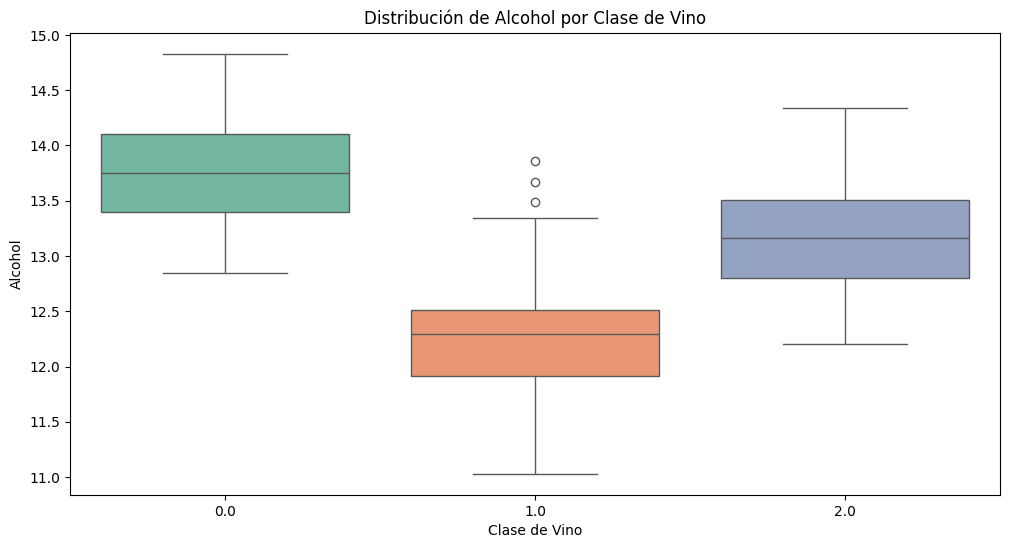

In [10]:
# 6. Boxplots para comparar distribuciones entre clases
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='alcohol', data=df, palette='Set2')
plt.title("Distribución de Alcohol por Clase de Vino")
plt.xlabel("Clase de Vino")
plt.ylabel("Alcohol")
plt.show()

**Boxplot de alcohol por clase**

- Vemos diferencias claras en los niveles medios de alcohol entre las 3 clases.

- Ejemplo de variable discriminativa que separa bien las clases.

- Idea didáctica: “Boxplots ayudan a comparar cómo una variable varía entre categorías. Aquí vemos que el alcohol es una buena variable para clasificación”.

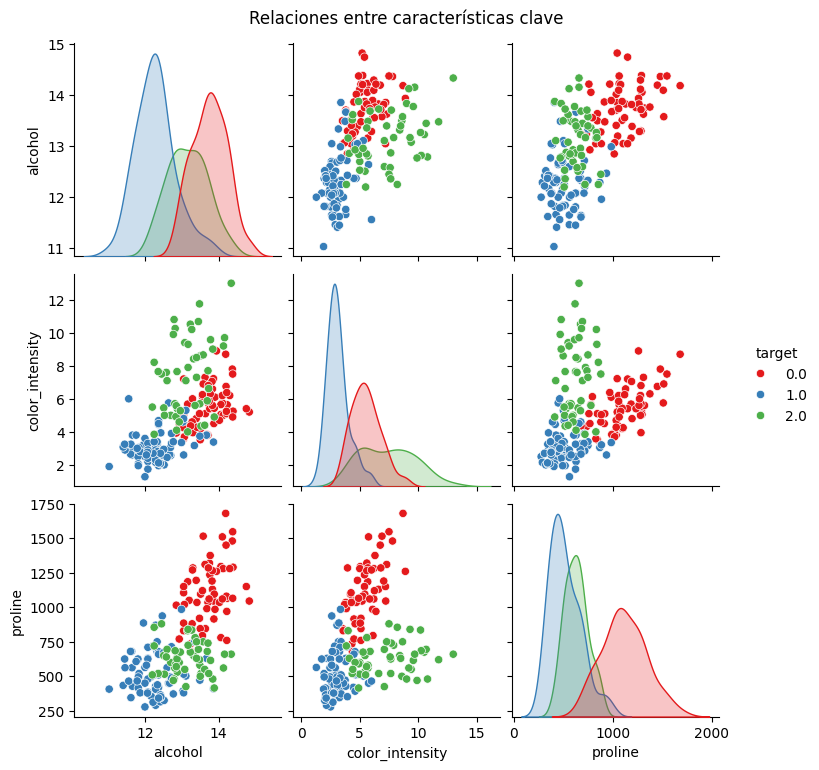

In [11]:
# 7. Pairplot (gráfico de dispersión cruzado entre variables seleccionadas)
sns.pairplot(df[['alcohol', 'color_intensity', 'proline', 'target']], hue="target", diag_kind="kde", palette="Set1")
plt.suptitle("Relaciones entre características clave", y=1.02)
plt.show()

**Pairplot**
- Visualiza relaciones entre pares de variables coloreados por clase.
- alcohol + proline muestran una separación clara de clases.
- Idea didáctica: “Esto es una exploración visual multivariable. Si las clases se separan bien en estos gráficos, es probable que los modelos también lo hagan”.

In [12]:
# 8. Análisis de varianza (ANOVA simplificado: diferencias entre clases en una variable)
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(
    df[df['target'] == 0]['alcohol'],
    df[df['target'] == 1]['alcohol'],
    df[df['target'] == 2]['alcohol']
)
print(f"\nANOVA en Alcohol entre clases: F = {f_stat:.2f}, p = {p_val:.5f}")


ANOVA en Alcohol entre clases: F = 135.08, p = 0.00000


**Análisis de varianza**
- p < 0.05 indica que hay diferencias significativas de alcohol entre las clases.
- Idea didáctica: “ANOVA nos da evidencia estadística de que no todas las clases son iguales respecto a esta variable”.

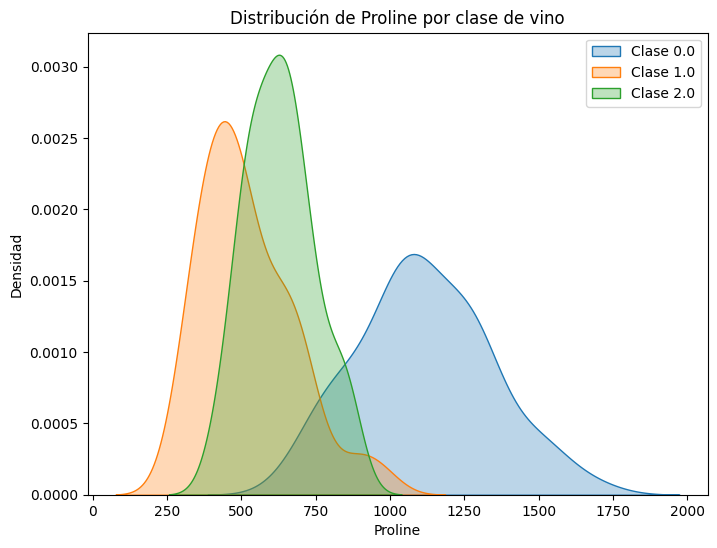

In [13]:
# 9. Visualización de densidad de una variable
plt.figure(figsize=(8,6))
for t in df['target'].unique():
    subset = df[df['target']==t]
    sns.kdeplot(subset['proline'], label=f"Clase {t}", fill=True, alpha=0.3)
plt.title("Distribución de Proline por clase de vino")
plt.xlabel("Proline")
plt.ylabel("Densidad")
plt.legend()
plt.show()

**Visualización de densidad de una variable**
- Cada clase muestra distribución distinta de proline, una variable muy discriminativa.
- Idea didáctica: “Las curvas de densidad son útiles para ver solapamiento entre clases. Aquí vemos que proline distingue bien al menos una de ellas”.

## CLASIFICACIÓN

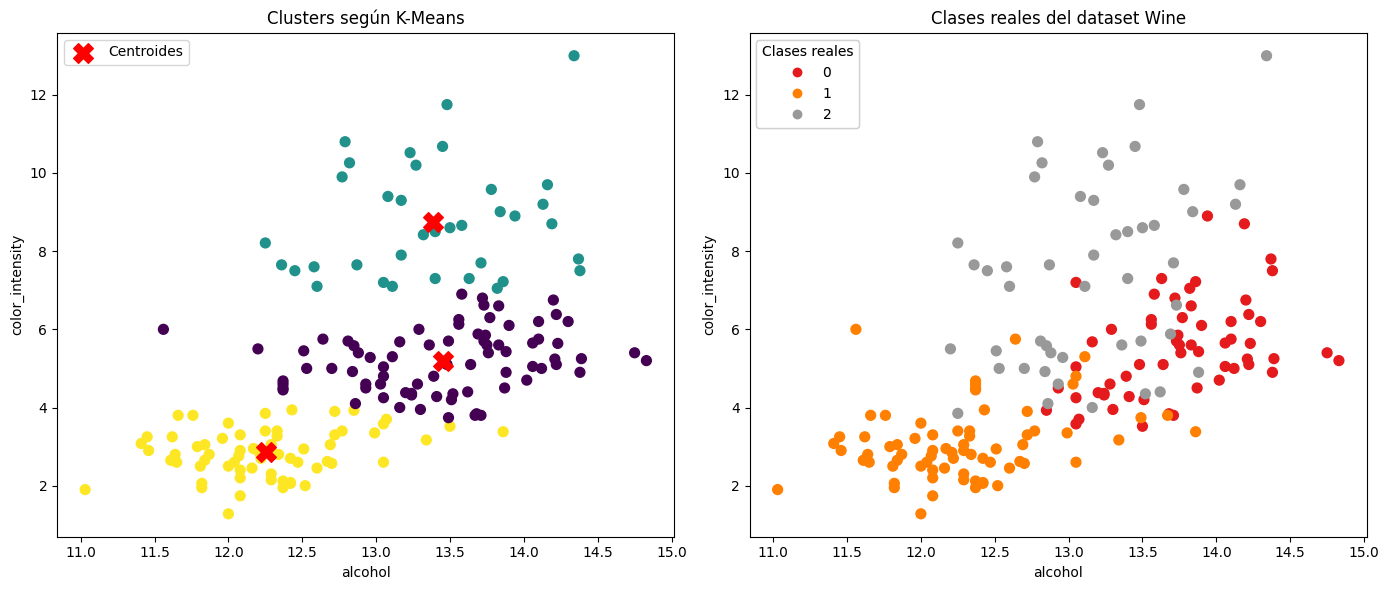

El nuevo registro [13.0, 5.0] pertenece al cluster: 0


In [23]:
# 1. Cargar el dataset real
wine = load_wine()
X = wine.data
y_true = wine.target
feature_names = wine.feature_names

# 2. Seleccionar 2 variables (alcohol y color_intensity)
X_plot = X[:, [0, 9]]

# 3. Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_plot)
y_kmeans = kmeans.predict(X_plot)

# 4. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# (a) Clusters de K-Means
scatter1 = axes[0].scatter(X_plot[:, 0], X_plot[:, 1], c=y_kmeans, cmap="viridis", s=50)
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Centroides")
axes[0].set_title("Clusters según K-Means")
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[9])
axes[0].legend()

# (b) Clases reales (target)
scatter2 = axes[1].scatter(X_plot[:, 0], X_plot[:, 1], c=y_true, cmap="Set1", s=50)
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Clases reales")
axes[1].add_artist(legend2)
axes[1].set_title("Clases reales del dataset Wine")
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[9])

plt.tight_layout()
plt.show()

# 5. Clasificar un nuevo registro
nuevo_registro = np.array([[13.0, 5.0]])  # Ejemplo
cluster_predicho = kmeans.predict(nuevo_registro)
print(f"El nuevo registro {nuevo_registro.tolist()[0]} pertenece al cluster: {cluster_predicho[0]}")



## MÉTRICAS

### Métricas internas (sin usar target)

In [15]:
# silhouette_score
sil_score = silhouette_score(X_plot, y_kmeans)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5097267872581326


**silhouette_score**
- Cercano a 1: clusters bien separados.
- Cerca de 0: clusters se solapan.
- Negativo: puntos mal asignados.
- Idea: “Sirve para validar si el número de clusters elegido es adecuado”.

### Métricas externas (usando target)

In [16]:
# Adjusted Rand Index
ari = adjusted_rand_score(y_true, y_kmeans)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.44311055380738223


**Adjusted Rand Index**
- 0 ≈ asignación aleatoria.
- 1 = clusters idénticos a las clases.

In [17]:
# Homogeneity, Completeness, V-Measure
print("Homogeneity:", homogeneity_score(y_true, y_kmeans))
print("Completeness:", completeness_score(y_true, y_kmeans))
print("V-Measure:", v_measure_score(y_true, y_kmeans))

Homogeneity: 0.42894381810530263
Completeness: 0.4421459805746615
V-Measure: 0.4354448539174943


**Homogeneity, Completeness, V-Measure**

- **Homogeneity** (0.429)
    - Indica qué tan “puros” son los clusters: si cada cluster contiene puntos de una sola clase real.
    - Valor cercano a 0.43 → significa que los clusters encontrados mezclan varias clases; es decir, no son homogéneos.
    - “K-Means no ha conseguido separar del todo los vinos de cada tipo, dentro de un mismo cluster conviven vinos de distintas clases”.


- **Completeness** (0.442)

    - Mide si todos los puntos de una clase real están dentro del mismo cluster.
    - Con 0.44, vemos que las clases verdaderas de vino se reparten en varios clusters en lugar de estar agrupadas.
    - “Los vinos de una misma variedad aparecen dispersos en varios clusters distintos”.


- **V-Measure** (0.435)

    - Es la media armónica entre Homogeneity y Completeness, un balance entre ambos.
    - Con 0.44 aprox., nos dice que el rendimiento global del clustering en este dataset es limitado:
    - "K-Means no refleja bien las clases reales"